## Most promising leads identification

### Problem Statement: An education company wants to build a model to identify most promising leads which has high chance to convert into paying customers

### 1. Reading and understanding the data

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split



In [99]:
df=pd.read_csv('Leads.csv')

### Checking headings of the dataset

In [100]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [101]:
df.shape

(9240, 37)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [103]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 2.  Finding out missing values in all columns

### Identifying columns with more than 40% missing values

In [104]:
df_missing40=df.columns[100*df.isnull().mean()>40]
len(df_missing40)

5

In [105]:
pd.set_option('display.max_columns', None)
100*df.isnull().mean()>40

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Last Activity                                    False
Country                                          False
Specialization                                   False
How did you hear about X Education               False
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Magazine                                         False
Newspaper 

### Drop columns with more than 40% missing values

In [106]:
df=df.drop(df_missing40,axis=1)

In [107]:
df.shape

(9240, 32)

In [108]:
round(100*df.isnull().sum()/df.shape[0],2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### The following columns can be dropped from dataframe as those are not relevant for current analysis:
#####   a)  Prospect ID
#####   b)  Country
#####   c)  How did you hear about X Education (the information is available in other columns)
#####   d)  Update me on Supply Chain Content
#####   e)  Get updates on DM Content
#####   f)   Do Not Email
#####   g)  Do Not Call
#####   h)  Tags
#####  k)   I agree to pay the amount through cheque



In [109]:
df=df.drop('Prospect ID',axis=1)

In [110]:
df=df.drop('Country',axis=1)

In [111]:
df=df.drop('How did you hear about X Education',axis=1)

In [124]:
df=df.drop('Update me on Supply Chain Content',axis=1)

In [112]:
df=df.drop('Get updates on DM Content',axis=1)

In [113]:
df=df.drop('Do Not Email', axis=1)

In [114]:
df=df.drop('Do Not Call', axis=1)

In [115]:
df=df.drop('Through Recommendations', axis=1)

In [116]:
df=df.drop('Receive More Updates About Our Courses', axis=1)

In [117]:
df=df.drop('Tags', axis=1)

In [118]:
df=df.drop('I agree to pay the amount through cheque', axis=1)

In [125]:
df.shape

(9240, 21)

In [126]:
df['Specialization']= df['Specialization'].replace('Select', 'Not Provided')

In [127]:
df['Lead Profile']= df['Lead Profile'].replace('Select', 'Not Provided')

In [128]:
df['City']=df['City'].replace('Select','Not Provided')

In [129]:
df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Provided,Unemployed,Better Career Prospects,No,No,No,No,No,No,Not Provided,Not Provided,No,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Provided,Unemployed,Better Career Prospects,No,No,No,No,No,No,Not Provided,Not Provided,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Potential Lead,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Not Provided,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Provided,Unemployed,Better Career Prospects,No,No,No,No,No,No,Not Provided,Mumbai,No,Modified


In [130]:
round(100*df.isnull().sum()/df.shape[0],2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Lead Profile                                     29.32
City      

#### There are few columns where missing values are quite high. But it is not advisable to drop those columns as it will result high data loss which are important for current analysis.
####  We will fill the missing values of these columns with 'Not Provided'

In [131]:
df['Specialization']=df['Specialization'].fillna('Not Provided')
df['What is your current occupation']=df['What is your current occupation'].fillna('Not Provided')
df['What matters most to you in choosing a course']=df['What matters most to you in choosing a course'].fillna('Not Provided')
df['Lead Profile']=df['Lead Profile'].fillna('Not Provided')
df['City']=df['City'].fillna('Not Provided')

In [132]:
round(100*df.isnull().sum()/df.shape[0],2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Lead Profile                                     0.00
City                        

####  As we can see, in few columns insignificant number of missing values are there wich we can treat by removing those rows

In [133]:
df=df.dropna(subset=['Lead Source'])
df=df.dropna(subset=['TotalVisits'])
df=df.dropna(subset=['Page Views Per Visit'])
df=df.dropna(subset=['Last Activity'])


In [134]:
round(100*df.isnull().sum()/df.shape[0],2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Lead Profile                                     0.0
City                                          

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Converted                                      9074 non-null   int64  
 4   TotalVisits                                    9074 non-null   float64
 5   Total Time Spent on Website                    9074 non-null   int64  
 6   Page Views Per Visit                           9074 non-null   float64
 7   Last Activity                                  9074 non-null   object 
 8   Specialization                                 9074 non-null   object 
 9   What is your current occupation                9074 non-n

##  3. Visualizing the data

C:\Users\sucha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x800 with 0 Axes>

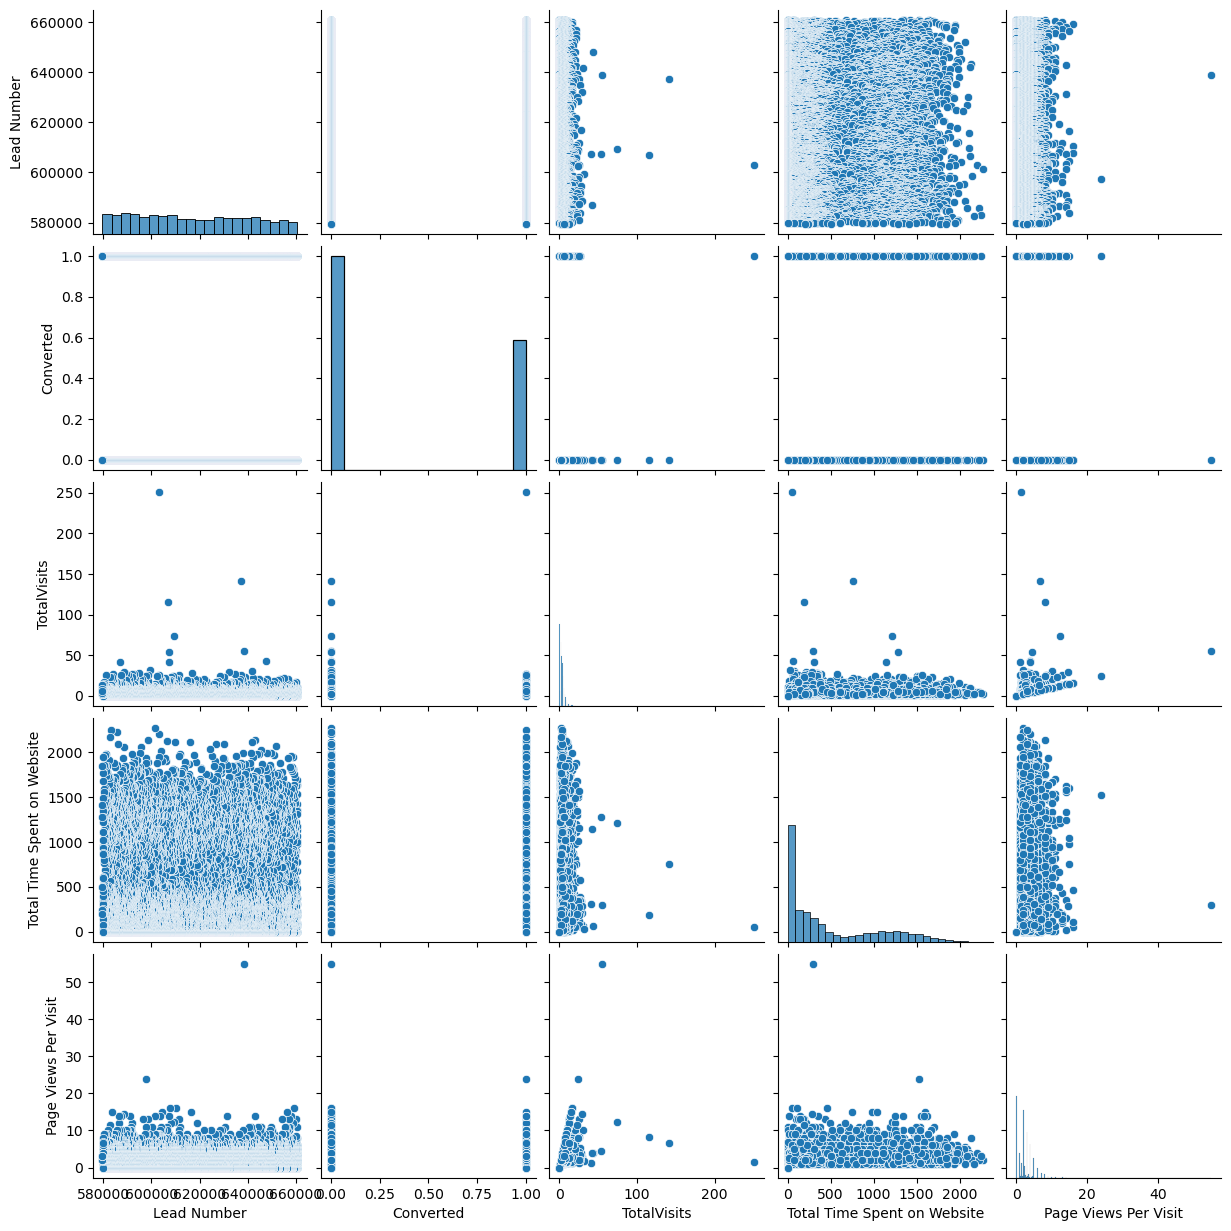

In [136]:
plt.figure(figsize=(16,8))
sns.pairplot(df)
plt.show()

#### Exploratory Data Analysis

#### Univariate Analysis of Lead Source

<Axes: ylabel='Lead Source'>

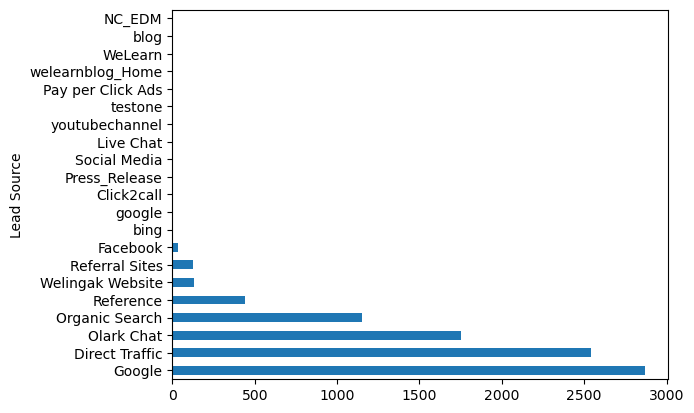

In [137]:
df['Lead Source'].value_counts().plot.barh()

#### Inferance: It is clearly visible that maximum Lead Source are from Google, Direct Traffic, Olark Chat & Organic Search

#### Univariate analysis of City

<Axes: ylabel='City'>

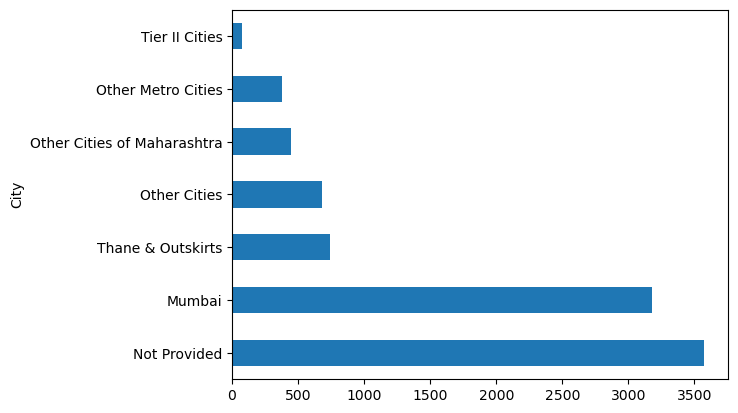

In [138]:
df['City'].value_counts().plot.barh()

#### Though hugh number of data is not available, still it is visible that maximum leads are from Mumbai

####  Univariate analysis of specialization

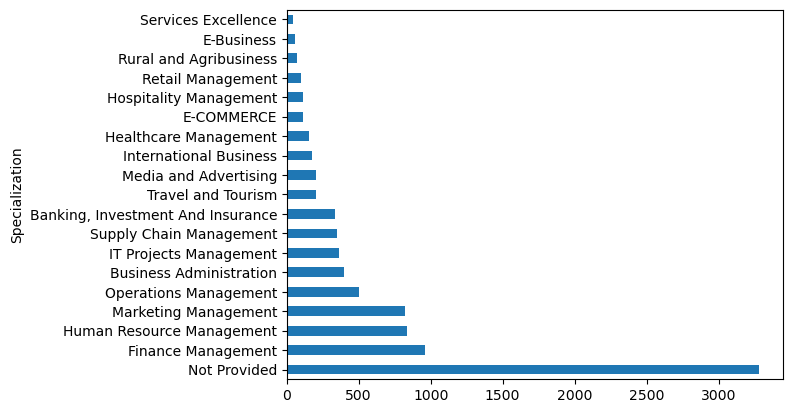

In [139]:
df['Specialization'].value_counts().plot.barh()
plt.show()

#### Inference: Maximum customers are from Finance Management, HR Management and Marketing Management background

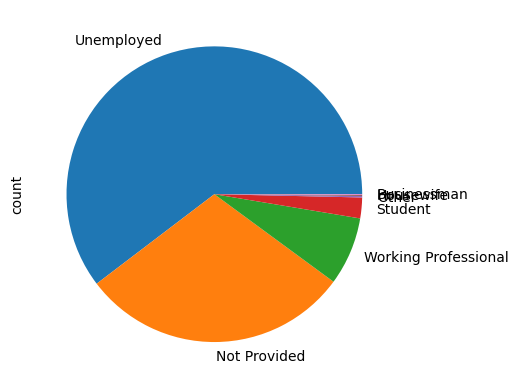

In [140]:
df['What is your current occupation'].value_counts().plot.pie()
plt.show()

#### Inference: Highest number of customers are Unemployed

#### Bivariate Analysis between 'Total Time Spent on Website' and 'Converted'


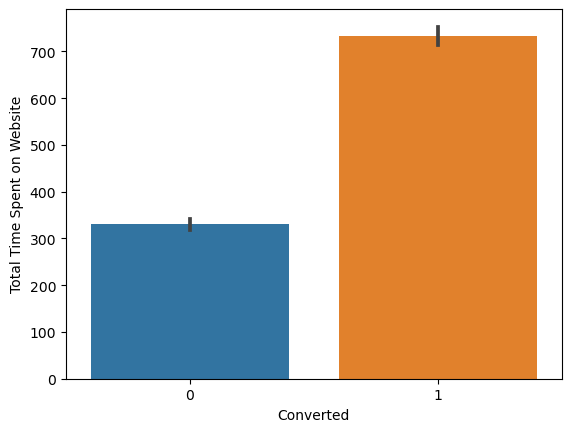

In [141]:
# Note: 1 means- the lead successfully converted and 0 means - Lead not converted
sns.barplot(x='Converted', y='Total Time Spent on Website', data=df)
plt.show()

#### Inference: The above two parameters have positive linear relationship

#### Introduction of Dummies for non-binary columns

In [142]:
# Getting list of non-binary columns:
nonb_cols= df.select_dtypes(include=['object']).columns
nonb_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [143]:
# getting the dummy variables for all non-binary columns and saving it in a new variable dummy_v:
dummy_v=pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement',   'Lead Profile', 'City',  'A free copy of Mastering The Interview', 'Last Notable Activity']])
dummy_v=dummy_v.astype(int)
dummy_v

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Not Provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Provided,What matters most to you in choosing a course_Other,Search_No,Search_Yes,Magazine_No,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Newspaper_No,Newspaper_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Not Provided,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Mumbai,City_Not Provided,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [144]:
# Merging dummy variables in main data frame:
df=pd.concat([df,dummy_v], axis=1)

In [145]:
df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Not Provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Provided,What matters most to you in choosing a course_Other,Search_No,Search_Yes,Magazine_No,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Newspaper_No,Newspaper_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Not Provided,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Mumbai,City_Not Provided,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable

In [146]:
df.shape

(9074, 135)

#### Dropping categorical variables as those are already covered in dummy variables

In [147]:
df.drop(['Lead Origin', 'Lead Source',  'Last Activity', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Lead Profile', 'City',  'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1,inplace=True)

In [148]:
df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Not Provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Provided,What matters most to you in choosing a course_Other,Search_No,Search_Yes,Magazine_No,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Newspaper_No,Newspaper_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Not Provided,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Mumbai,City_Not Provided,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0.0,0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,66072

In [149]:
df.shape

(9074, 119)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Columns: 119 entries, Lead Number to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int32(114), int64(3)
memory usage: 4.4 MB


#### Splitting of data in Training and Testing set

In [151]:
# Splitting data into training and Testing set by 70:30 ratio
np.random.seed(0)
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)

#### Re-scalling the features

In [152]:
# Using Min-Max scalling method for rescalling the features of train data set
from sklearn.preprocessing import MinMaxScaler  

In [153]:
scaler=MinMaxScaler()

In [154]:
# Applying scaler() to all columns excep dummy variables
num_var=['Lead Number','Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']  

In [155]:
df_train[num_var]=scaler.fit_transform(df_train[num_var])

In [156]:
# Checking heads of train data set
df_train.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Not Provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Provided,What matters most to you in choosing a course_Other,Search_No,Search_Yes,Magazine_No,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Newspaper_No,Newspaper_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Not Provided,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Mumbai,City_Not Provided,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0.633241,0.0,0.007968,0.178347,0.083333,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0

In [157]:
df_train.shape

(6351, 119)

In [158]:
df_train.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Not Provided,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Provided,What matters most to you in choosing a course_Other,Search_No,Search_Yes,Magazine_No,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Newspaper_No,Newspaper_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Not Provided,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Mumbai,City_Not Provided,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.00000

#### Dividing data into X & Y sets for model building

In [159]:
y_train=df_train.pop('Converted')
x_train=df_train

In [160]:
y_train.head()

3009    0.0
1012    0.0
9226    0.0
4750    1.0
7987    1.0
Name: Converted, dtype: float64

### Model Building
### Building 1st Model

In [161]:
# Creating a fitted model
from sklearn.linear_model import LogisticRegression
lreg= LogisticRegression()
lreg.fit(x_train, y_train)
from sklearn.feature_selection import RFE
# Running RFE to find Top 16 Features
rfe= RFE(lreg, step= 16)             
rfe= rfe.fit(x_train, y_train)

C:\Users\sucha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sucha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [162]:
# All Features with Rank
all_features= np.array(list(zip(x_train.columns, rfe.support_, rfe.ranking_)))
all_features

array([['Lead Number', 'True', '1'],
       ['TotalVisits', 'True', '1'],
       ['Total Time Spent on Website', 'True', '1'],
       ['Page Views Per Visit', 'True', '1'],
       ['Lead Origin_API', 'True', '1'],
       ['Lead Origin_Landing Page Submission', 'True', '1'],
       ['Lead Origin_Lead Add Form', 'True', '1'],
       ['Lead Origin_Lead Import', 'False', '5'],
       ['Lead Source_Click2call', 'True', '1'],
       ['Lead Source_Direct Traffic', 'True', '1'],
       ['Lead Source_Facebook', 'True', '1'],
       ['Lead Source_Google', 'True', '1'],
       ['Lead Source_Live Chat', 'False', '2'],
       ['Lead Source_NC_EDM', 'True', '1'],
       ['Lead Source_Olark Chat', 'True', '1'],
       ['Lead Source_Organic Search', 'True', '1'],
       ['Lead Source_Pay per Click Ads', 'False', '3'],
       ['Lead Source_Press_Release', 'False', '4'],
       ['Lead Source_Reference', 'True', '1'],
       ['Lead Source_Referral Sites', 'True', '1'],
       ['Lead Source_Social Media',

In [163]:
# Showing Top 16 features selected using RFE
top_16_features= list(all_features[all_features[:,1]=='True'][:,0])
top_16_features

['Lead Number',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Lead Origin_API',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Click2call',
 'Lead Source_Direct Traffic',
 'Lead Source_Facebook',
 'Lead Source_Google',
 'Lead Source_NC_EDM',
 'Lead Source_Olark Chat',
 'Lead Source_Organic Search',
 'Lead Source_Reference',
 'Lead Source_Referral Sites',
 'Lead Source_Welingak Website',
 'Lead Source_google',
 'Last Activity_Approached upfront',
 'Last Activity_Converted to Lead',
 'Last Activity_Email Bounced',
 'Last Activity_Email Opened',
 'Last Activity_Email Received',
 'Last Activity_Had a Phone Conversation',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Resubscribed to emails',
 'Last Activity_SMS Sent',
 'Last Activity_Unsubscribed',
 'Specialization_Hospitality Management',
 'Specialization_Media and Advertising',
 'Specialization_Not Provided',
 'Specialization_Retail Management',
 'Specialization

In [166]:
x_train_final= x_train[top_16_features]
x_train_final.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_google,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_Hospitality Management,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Retail Management,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Not Provided,Newspaper Article_No,Newspaper Article_Yes,Newspaper_No,Newspaper_Yes,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Not Provided,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
3009,0.633241,0.007968,0.178347,0.083333,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1012,0.859930,0.007968,0.085355,0.083333,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9226,0.002488,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4750,0.427428,0.007968,0.619946,0.083333,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
7987,0.111977,0.019920,0.711590,0.104167,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [167]:
x_train_final.shape

(6351, 59)

In [168]:
# Building Logistic Regression model using statsmodels

import statsmodels.api as sm
# Adding constraints
x_train_final= sm.add_constant(x_train_final) 
lreg1= sm.GLM(y_train, x_train_final, family= sm.families.Binomial())
# Fitting the model
lreg_model_1= lreg1.fit() 

C:\Users\sucha\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


In [169]:
# Checking the summary of our first Logistic Regression model
print(lreg_model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6295
Model Family:                Binomial   Df Model:                           55
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 23 Jun 2024   Deviance:                   1.3364e+05
Time:                        10:18:21   Pearson chi2:                 6.53e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

C:\Users\sucha\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1056: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\sucha\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1056: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


##### All p values are lower than 0.05, so their co-efficient values are statistically significant. 

In [170]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [171]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def vif_calculation(X_df):
    vif= pd.DataFrame()
    X= X_df.drop('const', axis= 1)
    vif['Features'] = X.columns
    vif['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF']= round(vif['VIF'], 2)
    return (vif.sort_values('VIF', ascending= False))

In [71]:
# Calculating the VIFs for the 1st model

vif_calculation(x_train_final)

C:\Users\sucha\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
25,Last Activity_Resubscribed to emails,inf
56,Last Notable Activity_Resubscribed to emails,inf
48,Lead Profile_Potential Lead,inf
47,Lead Profile_Other Leads,inf
46,Lead Profile_Not Provided,inf
45,Lead Profile_Lateral Student,inf
44,Lead Profile_Dual Specialization Student,inf
43,Newspaper_Yes,inf
42,Newspaper_No,inf
41,Newspaper Article_Yes,inf


#### VIF scores which are  > 5 to be dropped one by one


### Building 2nd Model

In [173]:
# Removing 'Lead Origin_Landing Page Submission', 'Lead Origin_API', 'What matters most to you in choosing a course_', 'What matters most to you in choosing a course_':
x_train_final.drop(['Lead Origin_Landing Page Submission', 'Lead Origin_API', 'What matters most to you in choosing a course_Better Career Prospects', 'What matters most to you in choosing a course_Not Provided'], axis=1,inplace=True)

In [174]:
x_train_final.head()

,const,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_google,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_Hospitality Management,Specialization_Media and Advertising,Specialization_Not Provided,Specialization_Retail Management,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Newspaper Article_No,Newspaper Article_Yes,Newspaper_No,Newspaper_Yes,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Not Provided,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
3009,1.0,0.633241,0.007968,0.178347,0.083333,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1012,1.0,0.859930,0.007968,0.085355,0.083333,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9226,1.0,0.002488,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4750,1.0,0.427428,0.007968,0.619946,0.083333,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
7987,1.0,0.111977,0.019920,0.711590,0.104167,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [175]:
x_train_final.shape

(6351, 56)

In [178]:
# Building Logistic Regression model using statsmodels

import statsmodels.api as sm
# Adding constraints
x_train_final= sm.add_constant(x_train_final) 
lreg1= sm.GLM(y_train, x_train_final, family= sm.families.Binomial())
# Fitting the model
lreg_model_1= lreg1.fit() 

C:\Users\sucha\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


In [179]:
# Checking the summary of our 2nd Logistic Regression model
print(lreg_model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           51
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 23 Jun 2024   Deviance:                   1.3419e+05
Time:                        10:23:29   Pearson chi2:                 6.56e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

C:\Users\sucha\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1056: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\sucha\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1056: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


In [176]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def vif_calculation(X_df):
    vif= pd.DataFrame()
    X= X_df.drop('const', axis= 1)
    vif['Features'] = X.columns
    vif['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF']= round(vif['VIF'], 2)
    return (vif.sort_values('VIF', ascending= False))

In [177]:
# Calculating the VIFs for the 2nd model

vif_calculation(x_train_final)

C:\Users\sucha\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
44,Lead Profile_Potential Lead,inf
52,Last Notable Activity_Resubscribed to emails,inf
36,Newspaper Article_No,inf
37,Newspaper Article_Yes,inf
23,Last Activity_Resubscribed to emails,inf
45,Lead Profile_Student of SomeSchool,inf
38,Newspaper_No,inf
39,Newspaper_Yes,inf
40,Lead Profile_Dual Specialization Student,inf
42,Lead Profile_Not Provided,inf


#### Still there are significant number of cases VIP score is higher than 5 which to be dropped

### Building 3rd Model

In [181]:
# Removing 'Lead Source_Google', 'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic', 'Lead Source_Reference', 'Lead Source_Olark Chat', 'Lead Source_Organic Search'
x_train_final.drop(['Lead Source_Google', 'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic', 'Lead Source_Reference', 'Lead Source_Olark Chat', 'Lead Source_Organic Search'], axis=1,inplace=True)

In [182]:
x_train_final.shape

(6351, 50)

In [183]:
# Building Logistic Regression model using statsmodels

import statsmodels.api as sm
# Adding constraints
x_train_final= sm.add_constant(x_train_final) 
lreg1= sm.GLM(y_train, x_train_final, family= sm.families.Binomial())
# Fitting the model
lreg_model_1= lreg1.fit() 

C:\Users\sucha\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


In [185]:
# Checking the summary of our 3rd Logistic Regression model
print(lreg_model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           45
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 23 Jun 2024   Deviance:                   1.2701e+05
Time:                        10:32:32   Pearson chi2:                 6.21e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

##### There is no change in p value

In [186]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def vif_calculation(X_df):
    vif= pd.DataFrame()
    X= X_df.drop('const', axis= 1)
    vif['Features'] = X.columns
    vif['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF']= round(vif['VIF'], 2)
    return (vif.sort_values('VIF', ascending= False))

In [187]:
# Calculating the VIFs for the 3rd model

vif_calculation(x_train_final)

C:\Users\sucha\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
17,Last Activity_Resubscribed to emails,inf
34,Lead Profile_Dual Specialization Student,inf
32,Newspaper_No,inf
31,Newspaper Article_Yes,inf
30,Newspaper Article_No,inf
35,Lead Profile_Lateral Student,inf
36,Lead Profile_Not Provided,inf
37,Lead Profile_Other Leads,inf
38,Lead Profile_Potential Lead,inf
39,Lead Profile_Student of SomeSchool,inf


#### Still there are significant number of cases VIP score is higher than 5 which to be dropped

### Building 4th Model

In [189]:
# RTemoving 'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified','Last Notable Activity_SMS Sent', 'Last Activity_Email Opened', 'Last Activity_SMS Sent', 'Last Notable Activity_Page Visited on Website'
x_train_final.drop(['Last Notable Activity_Email Opened','Last Notable Activity_Modified','Last Notable Activity_SMS Sent', 'Last Activity_Email Opened', 'Last Activity_SMS Sent', 'Last Notable Activity_Page Visited on Website'], axis=1,inplace=True)

In [190]:
x_train_final.shape

(6351, 44)

In [193]:
# Building Logistic Regression model using statsmodels

import statsmodels.api as sm
# Adding constraints
x_train_final= sm.add_constant(x_train_final) 
lreg1= sm.GLM(y_train, x_train_final, family= sm.families.Binomial())
# Fitting the model
lreg_model_1= lreg1.fit() 

C:\Users\sucha\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


In [194]:
# Checking the summary of our 4th Logistic Regression model
print(lreg_model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6311
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 23 Jun 2024   Deviance:                   1.7343e+05
Time:                        10:42:54   Pearson chi2:                 8.48e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

C:\Users\sucha\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1056: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
C:\Users\sucha\anaconda3\Lib\site-packages\statsmodels\genmod\families\family.py:1056: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


#### All p values are lower than 0.05

In [191]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def vif_calculation(X_df):
    vif= pd.DataFrame()
    X= X_df.drop('const', axis= 1)
    vif['Features'] = X.columns
    vif['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF']= round(vif['VIF'], 2)
    return (vif.sort_values('VIF', ascending= False))

In [192]:
# Calculating the VIFs for the 4th model

vif_calculation(x_train_final)

C:\Users\sucha\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
16,Last Activity_Resubscribed to emails,inf
37,Lead Profile_Student of SomeSchool,inf
31,Newspaper_Yes,inf
30,Newspaper_No,inf
29,Newspaper Article_Yes,inf
28,Newspaper Article_No,inf
34,Lead Profile_Not Provided,inf
35,Lead Profile_Other Leads,inf
36,Lead Profile_Potential Lead,inf
33,Lead Profile_Lateral Student,inf


#### Now all VIF values are lower than 5



##### As VIF value is lower than 5 and p value is lower than 0.05, 4th Model is more suitable for evaluation purposes.  

### Model Evaluation

In [263]:
x_train_final.shape

(6351, 44)

In [216]:
# Getting the predicted value on Train data set:
y_train_pred = lreg_model_1.predict(x_train_final)           

y_train_pred[:10]

3009    1.0
1012    0.0
9226    0.0
4750    1.0
7987    1.0
1281    1.0
2880    0.0
4971    1.0
7536    1.0
1248    1.0
dtype: float64

In [217]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1., 0., 0., 1., 1., 1., 0., 1., 1., 1.])

In [218]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()



,Converted,Converted_Prob,Prospect ID
0,0.0,1.0,3009
1,0.0,0.0,1012
2,0.0,0.0,9226
3,1.0,1.0,4750
4,1.0,1.0,7987


In [219]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0.0,1.0,3009,1
1,0.0,0.0,1012,0
2,0.0,0.0,9226,0
3,1.0,1.0,4750,1
4,1.0,1.0,7987,1


#### Confusion Metrics

In [222]:
# Confusion matrics  (Actual / predicted) when threshhold probability is 0.5: 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[2789 1116]
 [ 767 1679]]


#### Accuracy

In [224]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.7035112580695954


##### Overall accuracy of the model is 70% which is reasonably good

#### Plotting ROC Curve

In [225]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

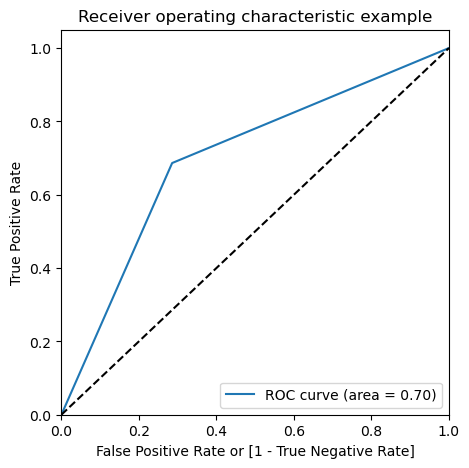

In [227]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

#### Adding Lead Score feature in Training data frame

In [228]:
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,Lead_Score
0,0.0,1.0,3009,1,100
1,0.0,0.0,1012,0,0
2,0.0,0.0,9226,0,0
3,1.0,1.0,4750,1,100
4,1.0,1.0,7987,1,100


##### Higher Lead score means probability of convertion is very high 

In [279]:
# features and their coefficicent from final model
parameters=lreg_model_1.params.sort_values(ascending=False)
parameters

Last Activity_Approached upfront                        4.035809e+15
Lead Source_NC_EDM                                      3.235242e+15
Last Notable Activity_Had a Phone Conversation          3.108599e+15
Total Time Spent on Website                             2.927970e+15
Lead Profile_Dual Specialization Student                2.825490e+15
Last Activity_Email Received                            2.707385e+15
Last Notable Activity_Resubscribed to emails            2.653881e+15
Last Activity_Resubscribed to emails                    2.653881e+15
What is your current occupation_Housewife               2.574639e+15
Newspaper_No                                            2.571414e+15
Lead Source_Welingak Website                            1.636494e+15
TotalVisits                                             1.505385e+15
Lead Profile_Lateral Student                            1.338846e+15
What is your current occupation_Working Professional    5.639834e+14
Last Notable Activity_Olark Chat C

#### A high positive co-efficient indicates that those variables have higher influence on predicting probability on positive conversion of students. 
#### Here the following are top three variables which have higher positive influence on prediction:
#### a) Last Activity_Approached upfront
#### b) Lead Source_NC_EDM 
#### c)  Last Notable Activity_Had a Phone Conversation 

### Prediction on Test data set

#### Understanding Test data set

In [229]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2723 entries, 3271 to 376
Columns: 119 entries, Lead Number to Last Notable Activity_View in browser link Clicked
dtypes: float64(2), int32(114), int64(3)
memory usage: 1.3 MB


In [230]:
df_test.shape

(2723, 119)

#### Re-scalling Test data set

In [272]:
# Applying scaler() to all columns excep dummy variables
num_var=['Lead Number','Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']  

In [273]:
df_test[num_var]=scaler.fit_transform(df_test[num_var])

In [276]:
col = x_train_final.columns

In [277]:
df_test=df_test[col]


KeyError: "['const'] not in index"

#### Prediction on Test data set by using 4th Model (Final Model)

In [259]:
# Adding constant value
df_test_sm = sm.add_constant(df_test)
df_test_sm.shape

(2723, 119)

In [262]:
# making prediction using 4th model
y_test_pred = lreg_model_1.predict(df_test)           

y_test_pred[:10]

ValueError: shapes (2723,119) and (44,) not aligned: 119 (dim 1) != 44 (dim 0)

In [258]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_test_pred_final = pd.DataFrame({'Converted':df_test.values, 'Converted_Prob':y_test_pred})
y_test_pred_final['Prospect ID'] =df_test.index
y_test_pred_final.head()

ValueError: Per-column arrays must each be 1-dimensional